# Practical example

## Importing the relevant libraries

In [7]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [8]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('D:\\The Data Science Course Complete Data Science Bootcamp 2024\\5- Advanced Statistical Methods in Python\\35 - Advanced Statistical Methods - Practical Example Linear Regression\\008 1.04.Real-life-example.csv')
# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [9]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [10]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [11]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [13]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

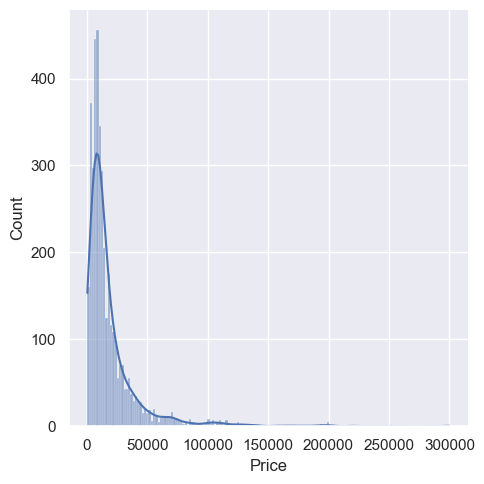

In [14]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.displot(data_no_mv['Price'], kde = True)

### Dealing with outliers

In [15]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


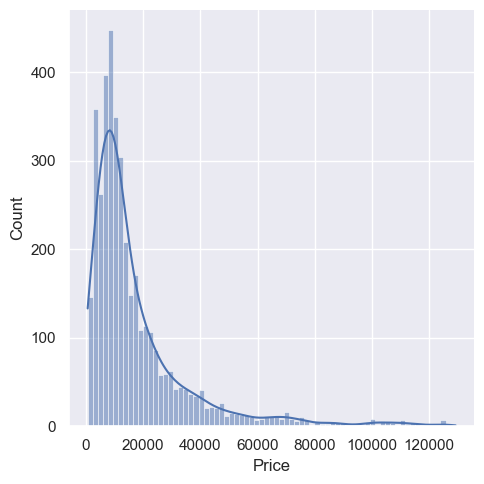

In [16]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.displot(data_1['Price'], kde=True)

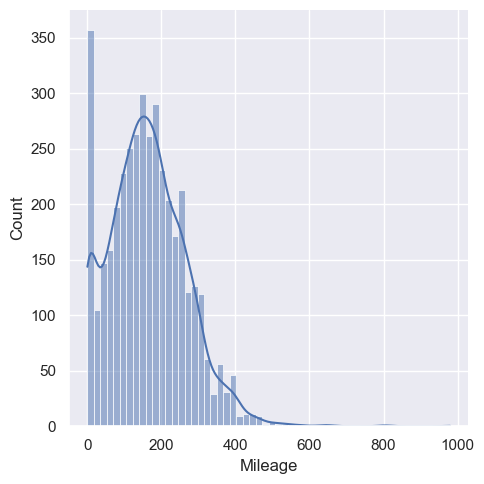

In [17]:
# We can treat the other numerical variables in a similar way
sns.displot(data_no_mv['Mileage'], kde=True)

In [18]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

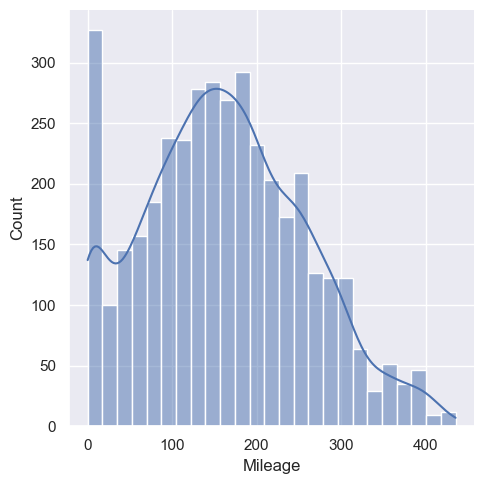

In [19]:
# This plot looks kind of normal, doesn't it?
sns.displot(data_2['Mileage'], kde=True)

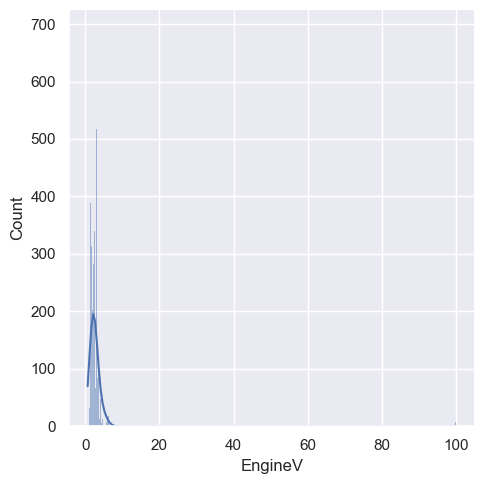

In [20]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.displot(data_no_mv['EngineV'], kde=True)

In [21]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

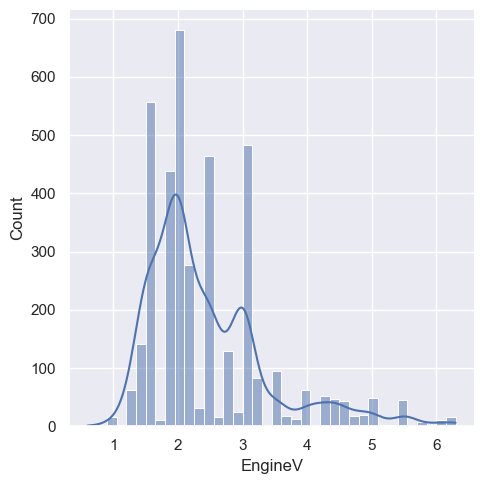

In [22]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.displot(data_3['EngineV'], kde=True)

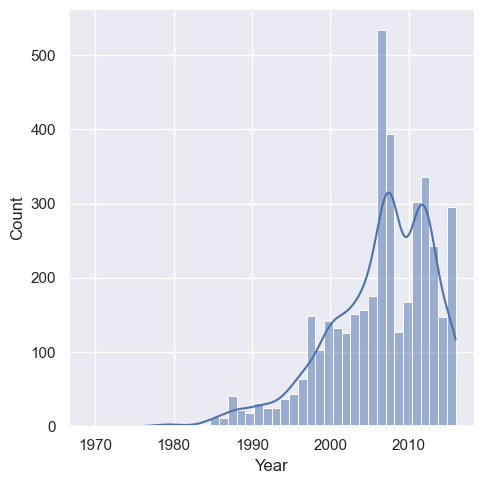

In [23]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.displot(data_no_mv['Year'], kde=True)

In [24]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

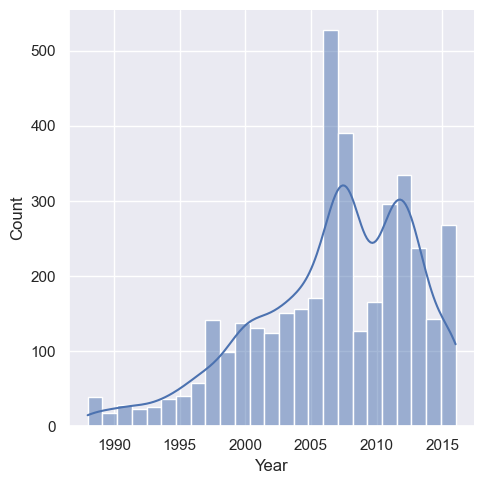

In [25]:
# Here's the new result
sns.displot(data_4['Year'], kde=True)

In [26]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [27]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [28]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

Text(0.5, 1.0, 'Price and Mileage')

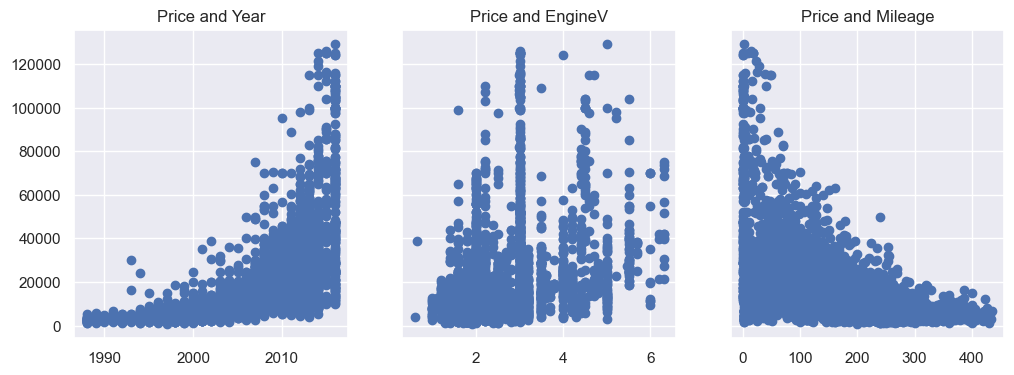

In [29]:
# Create 3 scatter plot for year, enginev and mileage in 3 different graphs:
    # Year vs Price
    # EngineV vs Price
    # Mileage vs Price

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True ,figsize=(12,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

# As we can see from the graphs above, there are no obvious issues with the relationships between the variables


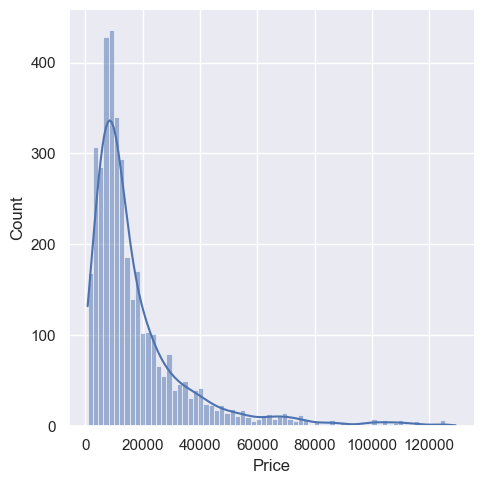

In [30]:
#We should transform one or more varaibles
sns.displot(data_cleaned['Price'], kde=True)
#Log transormation are especially useful when dealing with exponential relationships

## Relaxing the assumptions with a log transformation

In [31]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'log_price and Mileage')

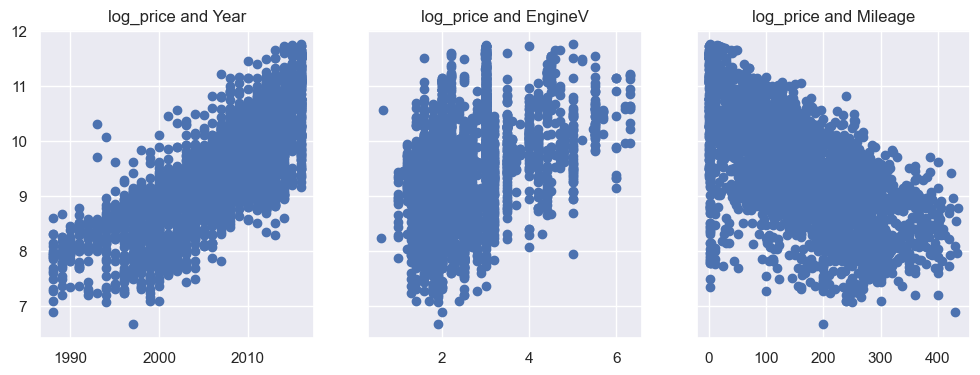

In [32]:
# Create 3 scatter plot for year, enginev and mileage in 3 different graphs:
    # Year vs log_price
    # EngineV vs log_price
    # Mileage vs log_price

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True ,figsize=(12,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

# As we can see from the graphs above, there are no obvious issues with the relationships between the variables


In [33]:
#Drrop the roginal prive variables form the data frame 
data_cleaned = data_cleaned.drop('Price', axis=1)

In [34]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [35]:
# show the OLS table assumption:

# import statsmodels.formula.api as smf
# lm = smf.ols(formula='log_price ~ Year + Mileage + EngineV', data=data_cleaned).fit()
# lm.summary()

# Bi haydi el case mafi de3i na3mel testing lal No autocorrelation la2an el case te3tetna mafiya ayya data mumken te3temed 3a el data el tenye 
# La2an kell customer 3endu his own data so ma7ada 5assu bel teni 

# Multicollinearity

In [36]:
data_cleaned.columns.values
# We know the year and the mileageare correlated 
#The newer the car the lower its mileage 

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [37]:
#calculate the correlation matrix to see if any of the explanatory variables are highly correlated.
correlation_matrix = data_cleaned[['Year', 'Mileage', 'EngineV', 'log_price']].corr()
correlation_matrix  

# Low Correlation (|r| < 0.3): Little to no multicollinearity.
# Moderate Correlation (0.3 ≤ |r| < 0.7): Potential concern for multicollinearity, but usually manageable.
# High Correlation (|r| ≥ 0.7): Significant multicollinearity, likely problematic.

,Year,Mileage,EngineV,log_price
Year,1.000000,-0.715361,-0.020152,0.746907
Mileage,-0.715361,1.000000,0.005710,-0.614806
EngineV,-0.020152,0.005710,1.000000,0.411935
log_price,0.746907,-0.614806,0.411935,1.000000


In [38]:
#calculate the Variance Inflation Factor (VIF) for each variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data_cleaned[['Year', 'Mileage', 'EngineV']].values, i) for i in range(data_cleaned[['Year', 'Mileage', 'EngineV']].shape[1])]
vif

# VIF = 1: No multicollinearity.
# 1 < VIF < 5: Moderate multicollinearity, perfectly okay.
# VIF ≥ 10: Very high multicollinearity, indicating that the regression coefficients are poorly estimated and highly unstable.

[10.35485444268895, 3.7915836908224834, 7.662067874651502]

In [39]:
#As we see the Year = 10.35 have a multicollinearity with EngineV and Mileage, we will drop Year.
data_no_multicollinearity = data_cleaned.drop('Year', axis=1)

data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Create Dummy Varaibles

In [40]:
#Dummy is hor how to deal with categorical variables in a regression model. If we need to add many dummies simultaneously, we can use pandas get_dummies() function.
# Note: If we have N categories, we will create N-1 dummies to avoid multicollinearity.

data_with_dummies = pd.get_dummies(data_no_multicollinearity, dtype=float,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [41]:
# Check the VIF of the features including the dummies
vif = [variance_inflation_factor(data_with_dummies.values, i) for i in range(data_with_dummies.shape[1])]
# Display the VIF
vif_df = pd.DataFrame({'Variable': data_with_dummies.columns, 'VIF': vif})
vif_df

,Variable,VIF
0,Mileage,4.460434
1,EngineV,13.445639
2,log_price,41.981260
3,Brand_BMW,2.603990
4,Brand_Mercedes-Benz,3.084356
5,Brand_Mitsubishi,1.830297
6,Brand_Renault,2.281498
7,Brand_Toyota,2.406546
8,Brand_Volkswagen,3.312814
9,Body_hatch,1.583516


### Rearrange a bit

In [42]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Linear Regression model 

### Declare the input and the targets

In [45]:
#target is the log_price column
target = data_preprocessed['log_price']
# inputs are all other columns except the log_price column
inputs = data_preprocessed.drop('log_price', axis=1)

### Scale our Data

In [46]:
# We need to use standardScaler to standardize our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [47]:
input_scaled = scaler.transform(inputs)

### Train test split

In [48]:
# Train test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_scaled, target, test_size=0.2, random_state=365)

### Create the regression model

In [49]:
reg = LinearRegression()
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
y_hat = reg.predict(X_train)

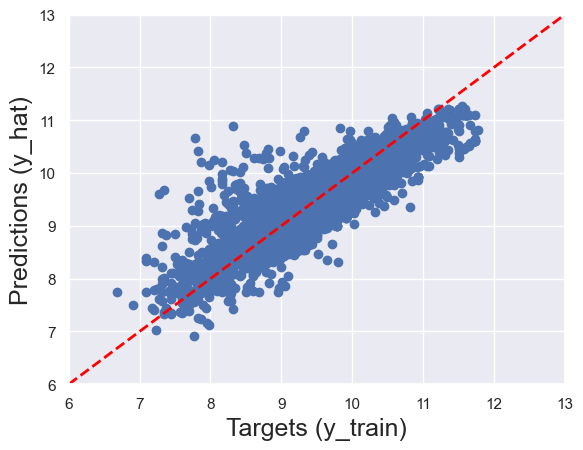

In [51]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot([6, 13], [6, 13], color='red', linestyle='--', linewidth=2, label='45-degree line')
plt.show()
#The model has passed his first check. All point are very close to the 45 degree line, which means our model is quite good.

Text(0.5, 1.0, 'Residual PDF')

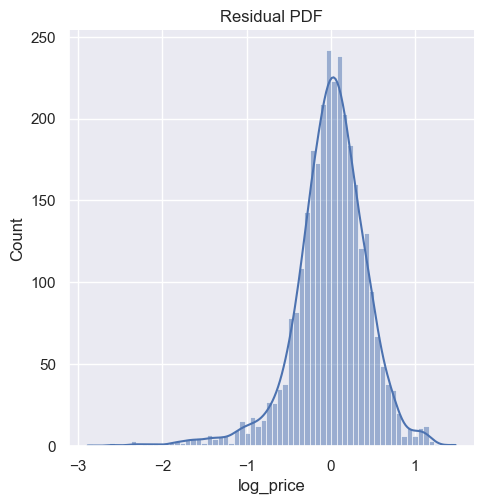

In [52]:
# Another popular check is the residual plot.
# Residual = Difference between the target and the predicted value
sns.displot(y_train - y_hat, kde=True)
plt.title("Residual PDF")
#From this graph we cn see that the graph is normally distributed but we can see  long tail in the negative part
# There are certain observation for wuch (y_train - y_hat) are much lower than the mean. (a much higher price is predicted that is observed)

In [53]:
# Calculate the R-squared
reg.score(X_train, y_train)

# R-squared is a measure of how well our model fits the data. In this case, 0.74 means that our model explains 74% of the variance in the log_price variable. wish is good

0.744996578792662

### Finding the weighs and bias of the model

In [54]:
# The bias was contained in reg intercept
reg.intercept_

9.415239458021299

In [55]:
# While the weight in the reg coef
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [56]:
# Since the weights is hard to read it so we create a summary table:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
# This model is far from interpretable
# Weights interpretation: 
#1. A positive weight indicates that as the feature value increases, the target variable also increases (log_price).
#2  A negative weight indicates that as the feature value increases, the target variable decreases (log_price).

# Dummy varibles:
# 1. A positive weight shows that the respective category(Brand) is more expensive than the benchmark (Audi)
# 2. A negative weight shows that the respective category(Brand) is less expensive than the benchmark (Audi).

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [57]:
# how to know wich variable a drop when we create our dummies:
data_cleaned['Brand'].unique()
# we can see that Audi is not shown in the table above so Audi is the variable dropped from the model
# So we know now that Audi is the benchmark in our model.

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing 

In [58]:
y_hat_test = reg.predict(X_test)

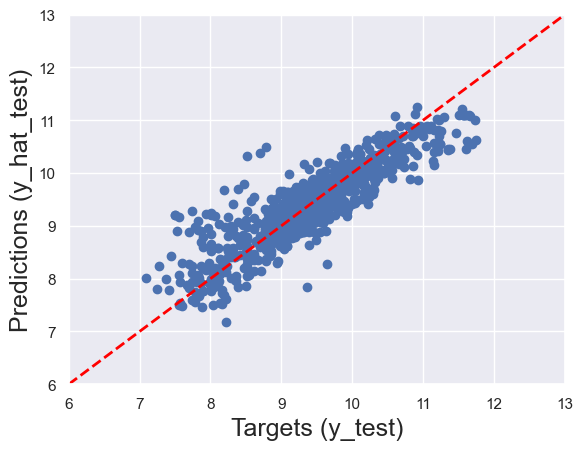

In [59]:
#plot the predictions against the test data
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot([6, 13], [6, 13], color='red', linestyle='--', linewidth=2, label='45-degree line')
plt.show()
# iza men la7ez bel graph enu belno2ot yalli mawjoude bi e5er el graph henne ktir concentrated ma3neta el model bye2dar ya3mel prediction bchakel ktir mni7 lal higher price
# bass bel tail taba3 el no2ot 7a nla7ez enu el ne2at ktir mba3sara ma3neta mannu 7a ykounp rediction ktir mni7

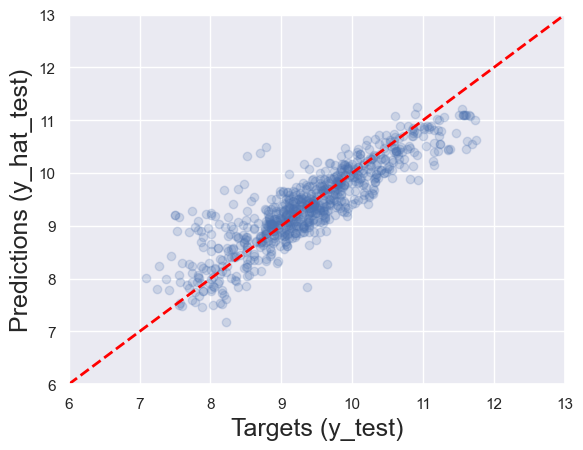

In [60]:
#plot the predictions against the test data
plt.scatter(y_test, y_hat_test , alpha= 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.plot([6, 13], [6, 13], color='red', linestyle='--', linewidth=2, label='45-degree line')
plt.show()
# iza men la7ez bel graph enu belno2ot yalli mawjoude bi e5er el graph henne ktir concentrated ma3neta el model bye2dar ya3mel prediction bchakel ktir mni7 lal higher price
# bass bel tail taba3 el no2ot 7a nla7ez enu el ne2at ktir mba3sara ma3neta mannu 7a ykounp rediction ktir mni7
# Sta3malna el alpha ta ybayyen el fare2 bchakel awda7

In [61]:
# Data Frame Performance
# If we take the exponential of the log_prices we will reach the original prices
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [62]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [63]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [64]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [65]:
#Difference Between Predictions and Targets
# Calculate residuals
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']

In [66]:
# Differences in Percentages
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [67]:
df_pf.describe()
# Iza mne2ra el table la7 nla7ez ennu el min lal difference ktir mni7 = 0.06% bass el max fi mechkle ennu equal 512% ma3neta 3enna predicted values aktar bi 512% men el target value( actual price)

,Predictions,Targets,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [68]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])
# Iza mnenzal 3al e5er el table la7 nla7ez ennu el predictions are higher that the targets
# Wel differences henne negative
# Ma3neta ina nefham ennu holi el data bimaslou el oultiers yalli 3a chmel el graph ( bel negative side)
# An explanation may be that we are missing an important factor in our model that affects the prices of a used cars lower. It may be the model of the car which we removed at the beginning of the data cleaning process.
# but it may also be that the car is damaged in some way. A piece of information we did not initially have

,Predictions,Targets,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
